Рассчитаем доходность, валатильность и посмотроим один из индикаторов.

In [2]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

In [21]:
sber = yf.download('SBER.ME', '2022-01-01')
sber.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,296.100006,303.880005,296.000000,302.850006,302.850006,45109764
2022-01-04,308.529999,308.799988,301.630005,304.500000,304.500000,49869680
2022-01-05,302.709991,304.190002,297.059998,297.260010,297.260010,38421900
2022-01-06,292.829987,295.100006,287.420013,292.910004,292.910004,72853031
2022-01-10,296.989990,298.500000,288.679993,290.260010,290.260010,61468730


Доходность - процентное изменение стоимости акции за один торговый день. Оно не учитывает дивиденды и комиссии.

In [26]:
# Скорректированая цена закрытия`
daily_close = sber[['Adj Close']]

# Дневная доходность
daily_pct_change = daily_close.pct_change()

# Заменить NA значения на 0
daily_pct_change.fillna(0, inplace=True)

print(daily_pct_change.head())

            Adj Close
Date                 
2022-01-03   0.000000
2022-01-04   0.005448
2022-01-05  -0.023777
2022-01-06  -0.014634
2022-01-10  -0.009047


In [32]:
# Значения за последний рабочий день месяца
monthly = sber.resample('BM').apply(lambda x: x[-1]) # Значения за последний рабочий день месяца

print(monthly.pct_change().tail())

# Пересчитать `sber` по кварталам и взять среднее значение за квартал
quarter = sber.resample("4M").mean()

print(quarter.pct_change().tail())

                Open      High       Low     Close  Adj Close    Volume
Date                                                                   
2022-01-31       NaN       NaN       NaN       NaN        NaN       NaN
2022-02-28 -0.519007 -0.405745 -0.552589 -0.492771  -0.492771       inf
2022-03-31  0.092929 -0.035843  0.168621  0.101073   0.101073 -0.701164
2022-04-29 -0.085619 -0.118106 -0.087125 -0.103626  -0.103626 -0.262266
2022-05-31  0.015606 -0.033846  0.022801 -0.024845  -0.024845 -1.000000
                Open      High       Low     Close  Adj Close    Volume
Date                                                                   
2022-01-31       NaN       NaN       NaN       NaN        NaN       NaN
2022-05-31 -0.376239 -0.370543 -0.386633 -0.381891  -0.381891 -0.176706


In [33]:
# Дневная доходность
daily_pct_change = daily_close / daily_close.shift(1) - 1

print(daily_pct_change.head())

            Adj Close
Date                 
2022-01-03        NaN
2022-01-04   0.005448
2022-01-05  -0.023777
2022-01-06  -0.014634
2022-01-10  -0.009047


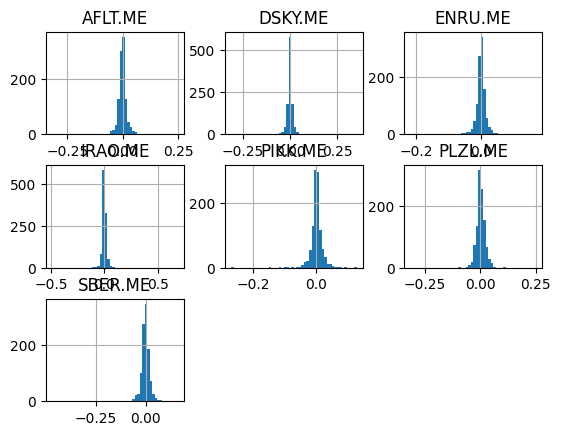

           AFLT.ME      DSKY.ME      ENRU.ME      IRAO.ME      PIKK.ME  \
count  1083.000000  1083.000000  1083.000000  1083.000000  1083.000000   
mean     -0.000972     0.000374    -0.000451     0.000517     0.000921   
std       0.026867     0.022558     0.018693     0.033191     0.020145   
min      -0.318367    -0.312391    -0.216316    -0.487897    -0.268180   
25%      -0.009607    -0.005359    -0.006298    -0.008973    -0.005915   
50%      -0.000898     0.000220     0.000000    -0.000113     0.000899   
75%       0.007305     0.006087     0.006263     0.008909     0.007936   
max       0.247176     0.353146     0.167435     0.683900     0.127685   

           PLZL.ME      SBER.ME  
count  1083.000000  1083.000000  
mean      0.001417     0.000263  
std       0.024083     0.026418  
min      -0.315727    -0.466825  
25%      -0.009274    -0.009443  
50%       0.000470     0.000148  
75%       0.012258     0.011353  
max       0.249888     0.160000  


In [39]:
# Диаграмма `daily_pct_c`
daily_pct_change.hist(bins=50)

plt.show()

# Общая статистика
print(daily_pct_change.describe())